In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'C:/Users/Zianna/OneDrive/Desktop/PROJECTS- DSBA/FRA/Milestone 1/Company_Data2015-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
df.shape

(3586, 67)

In [5]:
print('The number of rows in this dataset is ',df.shape[0],'\n',
'The number of columns in this dataset is ',df.shape[1])

The number of rows in this dataset is  3586 
 The number of columns in this dataset is  67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


#### RENAMING THE COLUMNS AS PER NEW NAME

In [51]:
df_dict = pd.read_excel("C:/Users/Zianna/OneDrive/Desktop/PROJECTS- DSBA/FRA/Milestone 1/Company_Data2015-1.xlsx")
df_dict

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [52]:
df.columns = df_dict['New Field Name'].to_list()
df.columns

KeyError: 'New Field Name'

#### THE COLUMNS HAVE SUCCESSFULLY BEEN RENAMED

#### PRESENCE OF OUTLIERS IN THE DATASET

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth Next Year'),
  Text(3, 0, 'Equity Paid Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital Employed'),
  Text(6, 0, 'Total Debt'),
  Text(7, 0, 'Gross Block '),
  Text(8, 0, 'Net Working Capital '),
  Text(9, 0, 'Current Assets '),
  Text(10, 0, 'Current Liabilities and Provisions '),
  Text(11, 0, 'Total Assets/Liabilities '),
  Text(12, 0, 'Gross Sales'),
  Text(13, 0, 'Net Sales'),
  Text(14, 0, 'Other Income'),
  Text(15, 0, 'Value Of Output'),
  Text(16, 0, 'Cost of Production'),
  Text(17, 0, 'Selling Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 'Ad

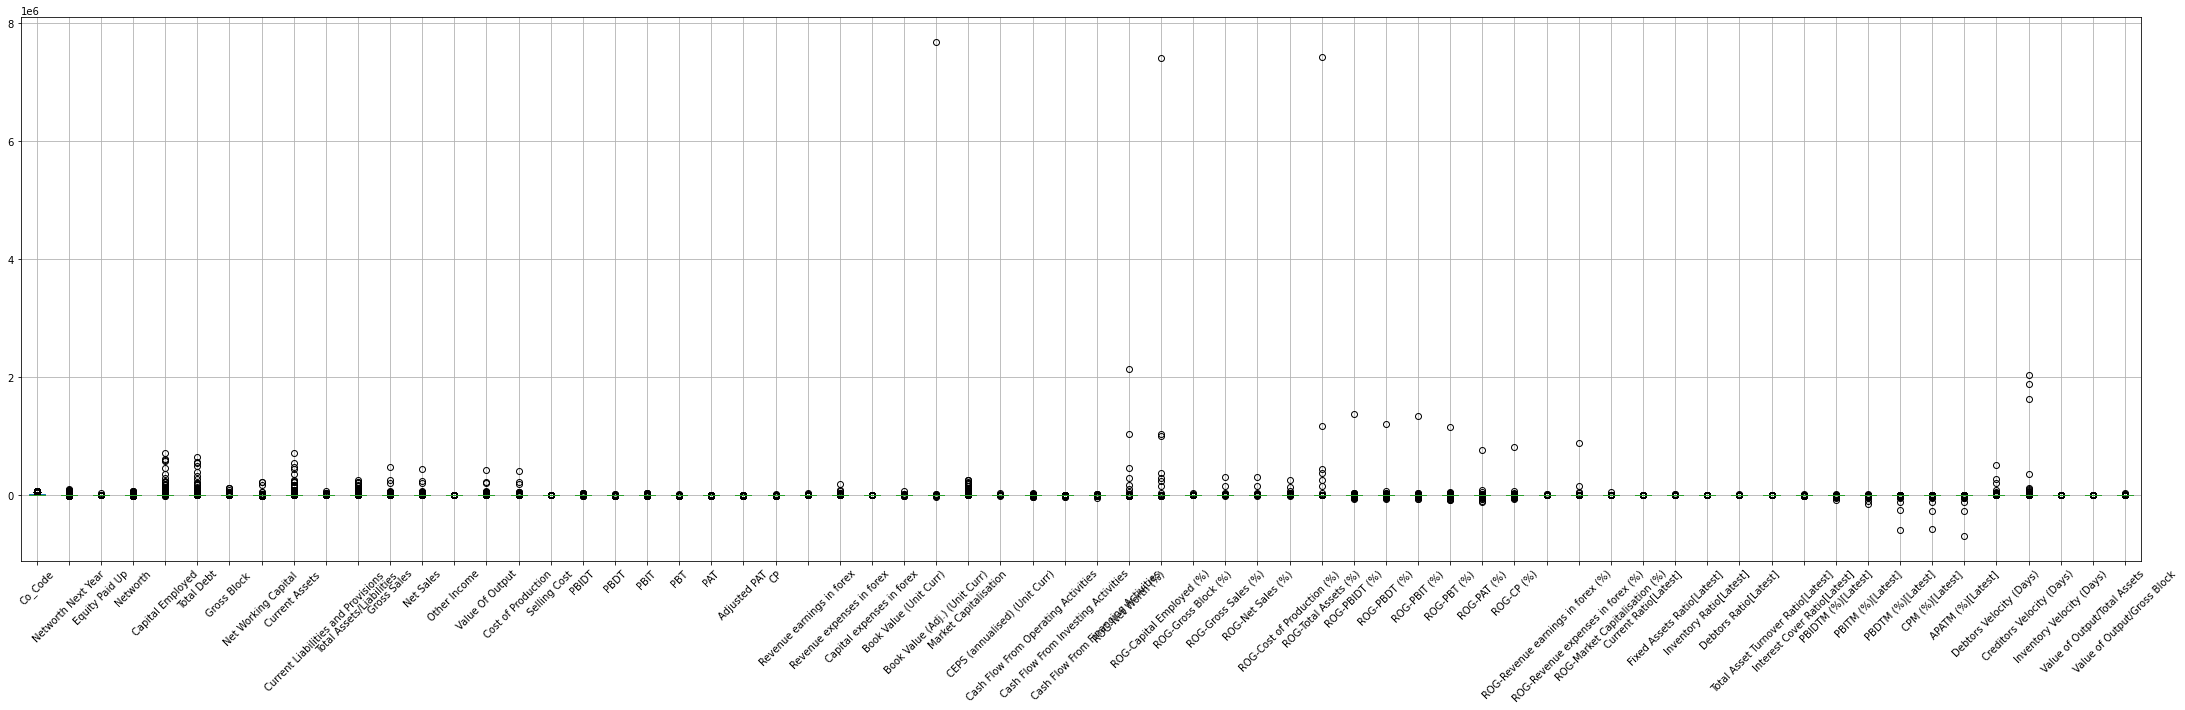

In [11]:
plt.figure(figsize=(38,10))
df.boxplot()
plt.xticks(rotation=45)

 We can see that there are outliers present in most of the variables.
 Before outlier treatment we can first drop columns that we do not deem essential for the data.

In [12]:
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)
df.head()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


### THERE ARE OUTLIERS PRESENT IN MOST OF THE VARIABLES. WE CAN GO AHEAD AND TREAT THE OUTLIERS. BUT Before Outlier treatment, let's get the default variable from the column "Networth_Next_Year" When net worth next year is negative then 1 When net worth next year is postive then 0.

### 1.3 TRANSFORMING TARGET VARIABLE TO 0 & 1

In [13]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

KeyError: 'Networth_Next_Year'

In [14]:
df[['default','Networth_Next_Year']].head(10)

KeyError: "None of [Index(['default', 'Networth_Next_Year'], dtype='object')] are in the [columns]"

In [15]:
df['default'].value_counts()

KeyError: 'default'

In [16]:
sns.barplot(df.default.value_counts().index,df.default.value_counts().values)
plt.title("Count of Default")
plt.show()
print(df.default.value_counts(normalize=True))

AttributeError: 'DataFrame' object has no attribute 'default'

In [17]:
df.groupby(df['default']).sum()

KeyError: 'default'

In [18]:
## DROPPING COLUMNS THAT ARE NOT USEFUL FOR US

In [19]:
df = df.drop(['Networth_Next_Year'], axis = 1)

KeyError: "['Networth_Next_Year'] not found in axis"

In [20]:
print(df.isnull().sum())

Networth Next Year                0
Equity Paid Up                    0
Networth                          0
Capital Employed                  0
Total Debt                        0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 65, dtype: int64


In [21]:
## No. of defaults per column

In [22]:
## NULL VALUES IN THE DATASET

In [23]:
df.isnull().sum().sort_values(ascending=False)

Inventory Velocity (Days)              103
Book Value (Adj.) (Unit Curr)            4
Current Ratio[Latest]                    1
PBITM (%)[Latest]                        1
Fixed Assets Ratio[Latest]               1
                                      ... 
Book Value (Unit Curr)                   0
Market Capitalisation                    0
CEPS (annualised) (Unit Curr)            0
Cash Flow From Operating Activities      0
Value of Output/Gross Block              0
Length: 65, dtype: int64

In [24]:
df.isnull().sum().sum()

118

There are 118 missing values in the dataset. We will now check the missing value by rows

In [25]:
df.isnull().sum(axis = 1).sort_values(ascending = False)

2825    11
393      1
277      1
598      1
3001     1
        ..
1213     0
1215     0
1216     0
1217     0
3585     0
Length: 3586, dtype: int64

In [26]:
df.size

233090

In [27]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

KeyError: "['default'] not found in axis"

In [28]:
df_X.head()

NameError: name 'df_X' is not defined

In [29]:
plt.figure(figsize=(38,10))
df_X.boxplot()

NameError: name 'df_X' is not defined

<Figure size 2736x720 with 0 Axes>

### 1.1 OUTLIER TREATMENT

In [30]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

NameError: name 'df_X' is not defined

In [31]:
((df_X > UL) | (df_X < LL)).sum()

NameError: name 'df_X' is not defined

In [32]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

NameError: name 'df_X' is not defined

In [33]:
df_X.isnull().sum()

NameError: name 'df_X' is not defined

In [34]:
plt.figure(figsize=(38,10))
df_X.boxplot()
plt.xticks(rotation=45)

NameError: name 'df_X' is not defined

<Figure size 2736x720 with 0 Axes>

The outliers present in the data is large in number. Treating the outlier may affect the data. Since, the data has financial inputs and is captured from different companies of different sizes, the outliers has information which is important in nature and should be treated accordingly.  

### 1.2 MISSING VALUE TREATMENT

In [35]:
df_X.isnull().sum().sum()

NameError: name 'df_X' is not defined

In [36]:
df_X.shape

NameError: name 'df_X' is not defined

In [37]:
## VISUAL INSPECTION OF THE MISSING DATA

In [38]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

NameError: name 'df_X' is not defined

In [39]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

NameError: name 'df_sub1' is not defined

<Figure size 864x576 with 0 Axes>

Inspecting total missing variables by row

In [40]:
df_sub1.isnull().sum(axis = 1)

NameError: name 'df_sub1' is not defined

In [41]:
df_sub1.isnull().sum().sort_values(ascending = False)/df.index.size

NameError: name 'df_sub1' is not defined

In [42]:
### Dropping columns with more than 30% missing values

In [43]:
df_sub2 = df_sub1.drop(["ROG_Rev_exp_in_forex_perc","ROG_Rev_earn_in_forex_perc"],
                           axis = 1)

NameError: name 'df_sub1' is not defined

In [44]:
df_sub2.shape

NameError: name 'df_sub2' is not defined

SEGGREGATING THE PREDICTORS AND RESPONSE

In [45]:
predictors = df_sub2.drop('default', axis = 1)
response = df_sub2['default']

NameError: name 'df_sub2' is not defined

#### SACLING OF PREDICTOR VARIABLES

Scaling of predictor variables is essential for Regression models as it makes it easier for learning the problem in the dataset. Scaling the data is also essential as it makes sure that the values of the predictor variables, whether it may be too large or too small are standardized uniformly. 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

NameError: name 'predictors' is not defined

In [47]:
df_sub3 = pd.concat([scaled_predictors, response], axis = 1)

NameError: name 'scaled_predictors' is not defined

In [48]:
## We can now move on to imputing the remaining values

In [49]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(df_sub3), columns = df_sub3.columns)

NameError: name 'df_sub3' is not defined

In [ ]:
df_imputed.isnull().sum()

The data has been imputed using the KNN imputer. The data is first scaled and processed before imputing the missing values

In [ ]:
df_copy=df_imputed.copy()

Correlations between variables in the dataset:

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_imputed.corr(), annot=True, fmt='.2f', cmap='crest', mask=np.triu(df_imputed.corr(),+1))

In [ ]:
X = df_imputed.drop('default', axis = 1)
y = df_imputed['default']

### 1.6 SPLITTING THE MODEL INTO TRAIN & TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, stratify= y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

Using VIF to check the important variables that will be used for model building

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df_imputed.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

The above gives the most important variables for logistic regression model building using VIF. Since there are lots of variables present in the data VIF may not be the best possible way to use for model building. An alternative to model building in this case is RFE. 

In [ ]:
X.columns

### 1.6 BUILDING LOGISTIC REGRESSION MODEL 

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

### MODEL 1

In [ ]:

LogR = LogisticRegression()
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)
selector.n_features_

In [ ]:
selector.ranking_

In [ ]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

In [ ]:
model_1 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Gross_Block+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_1.summary()

In [ ]:
model_2 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_2.summary()

In [ ]:
model_3 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Curr_Liab_and_Prov+Total_Assets_to_Liab+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_3.summary()

In [ ]:
model_4 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_4.summary()

In [ ]:
model_5 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_5.summary()

In [ ]:
model_6 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_6.summary()

In [ ]:
model_7 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_7.summary()

In [ ]:
model_8 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_8.summary()

In [ ]:
y_prob_pred_train = model_8.predict(df_train)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
y_prob_pred_8 = model_8.predict()

In [ ]:
sns.boxplot(x=df_imputed['default'],y=y_prob_pred_8)
plt.xlabel('Default');

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['default'],y_prob_pred_train)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

Validating on the train set with revised threshold

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

Validating on the test set

In [ ]:
y_prob_pred_test = model_8.predict(df_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(df_test['default'],y_class_pred,digits=3))

### 1.4 EDA

for performing the EDA we will use the original data, using only the important variables that was used for model building

In [ ]:
df = pd.read_excel(r'C:/Users/Zianna/OneDrive/Desktop/PROJECTS- DSBA/FRA/Company_Data2015-1.xlsx')

In [ ]:
df.head()

In [ ]:
df_dict = pd.read_excel("C:/Users/Zianna/OneDrive/Desktop/PROJECTS- DSBA/FRA/Data_Dictionary.xlsx")
df_dict

In [ ]:
df.columns = df_dict['New Field Name'].to_list()
df.columns

### UNIVARIATE ANALYSIS

In [ ]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(X[column].describe(),end=' ')
    
    
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(X[column], kde=True, color='darkcyan', bins=20);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=X[column],palette='mako_r' )
    plt.show()

In [ ]:
univariateAnalysis_numeric('Networth')

In [ ]:
univariateAnalysis_numeric('Capital_Employed')

In [ ]:
univariateAnalysis_numeric('Total_Assets_to_Liab')

In [ ]:
univariateAnalysis_numeric('Cost_of_Prod')

In [ ]:
univariateAnalysis_numeric('Book_Value_Adj_Unit_Curr')

In [ ]:
univariateAnalysis_numeric('ROG_Cost_of_Prod_perc')

In [ ]:
univariateAnalysis_numeric('Curr_Ratio_Latest')

In [ ]:
univariateAnalysis_numeric('Interest_Cover_Ratio_Latest')

In [ ]:
pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness'])

#### BI-VARIATE ANALYSIS

In [ ]:
networth = df.sort_values(by="Networth",ascending=False)
networth.head()

In [ ]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Networth',data=networth.head(10))
plt.title("Largest networth company",fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
debt = df.sort_values(by="Total_Debt",ascending=False)
debt.head()

In [ ]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Total_Debt',data=debt.head(10))
plt.title("Total debt of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
curr_assests = df.sort_values(by="Curr_Assets",ascending=False)
curr_assests.head()

In [ ]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Curr_Assets',data=curr_assests.head(10))
plt.title("Current Assets of Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
nny = df.sort_values(by="Networth_Next_Year",ascending=False)
nny.head()

In [ ]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='Co_Name', y='Networth_Next_Year',data=nny.head(10))
plt.title("Networth Next Year Top 10 company",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='BuPu', mask=np.triu(df.corr(),+1))